Análisis Exploratorio de Datos (EDA)

El siguiente paso es realizar un análisis exploratorio de los datos (EDA). Este proceso incluye visualizar los datos, identificar patrones, entender las distribuciones de las variables y buscar posibles correlaciones entre ellas. También nos permitirá detectar anomalías o problemas en los datos que podrían requerir una limpieza adicional.

Parte 1: Cargar Datos y Análisis Básico

- Esta primera parte implica cargar el dataset y realizar un análisis inicial para comprender la estructura básica de los datos, incluyendo el tipo y el resumen estadístico de las variables, así como identificar la presencia de valores faltantes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta al archivo del dataset en tu entorno local
file_path = 'Data/data_Galicia/dataset_unificado_imputed.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Análisis de la estructura del dataset
print("Información del Dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(df.describe())

# Verificación de valores perdidos
print("\nValores Perdidos en el Dataset:")
print(df.isnull().sum())

# Resumen: Hemos cargado el dataset y obtenido una visión general de su estructura, 
# tipos de datos y estadísticas descriptivas básicas. Además, hemos identificado la presencia 
# de valores faltantes en las distintas columnas.


Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               15100 non-null  float64
 1   longitude              15100 non-null  float64
 2   brightness             15100 non-null  float64
 3   scan                   15100 non-null  float64
 4   track                  15100 non-null  float64
 5   acq_date               15100 non-null  object 
 6   acq_time               15100 non-null  int64  
 7   confidence             15100 non-null  int64  
 8   bright_t31             15100 non-null  float64
 9   frp                    15100 non-null  float64
 10  daynight               15100 non-null  object 
 11  location_info          15100 non-null  object 
 12  Provincia              15100 non-null  object 
 13  Comunidad_Autonoma     15100 non-null  object 
 14  Estacion               15100 

Parte 2: Visualización de Distribuciones de Variables Clave

- En esta sección, visualizaremos las distribuciones de algunas variables clave para comprender mejor su comportamiento y distribución. 

- Las visualizaciones incluyen histogramas para variables como la temperatura del suelo, humedad relativa, precipitación y viento.

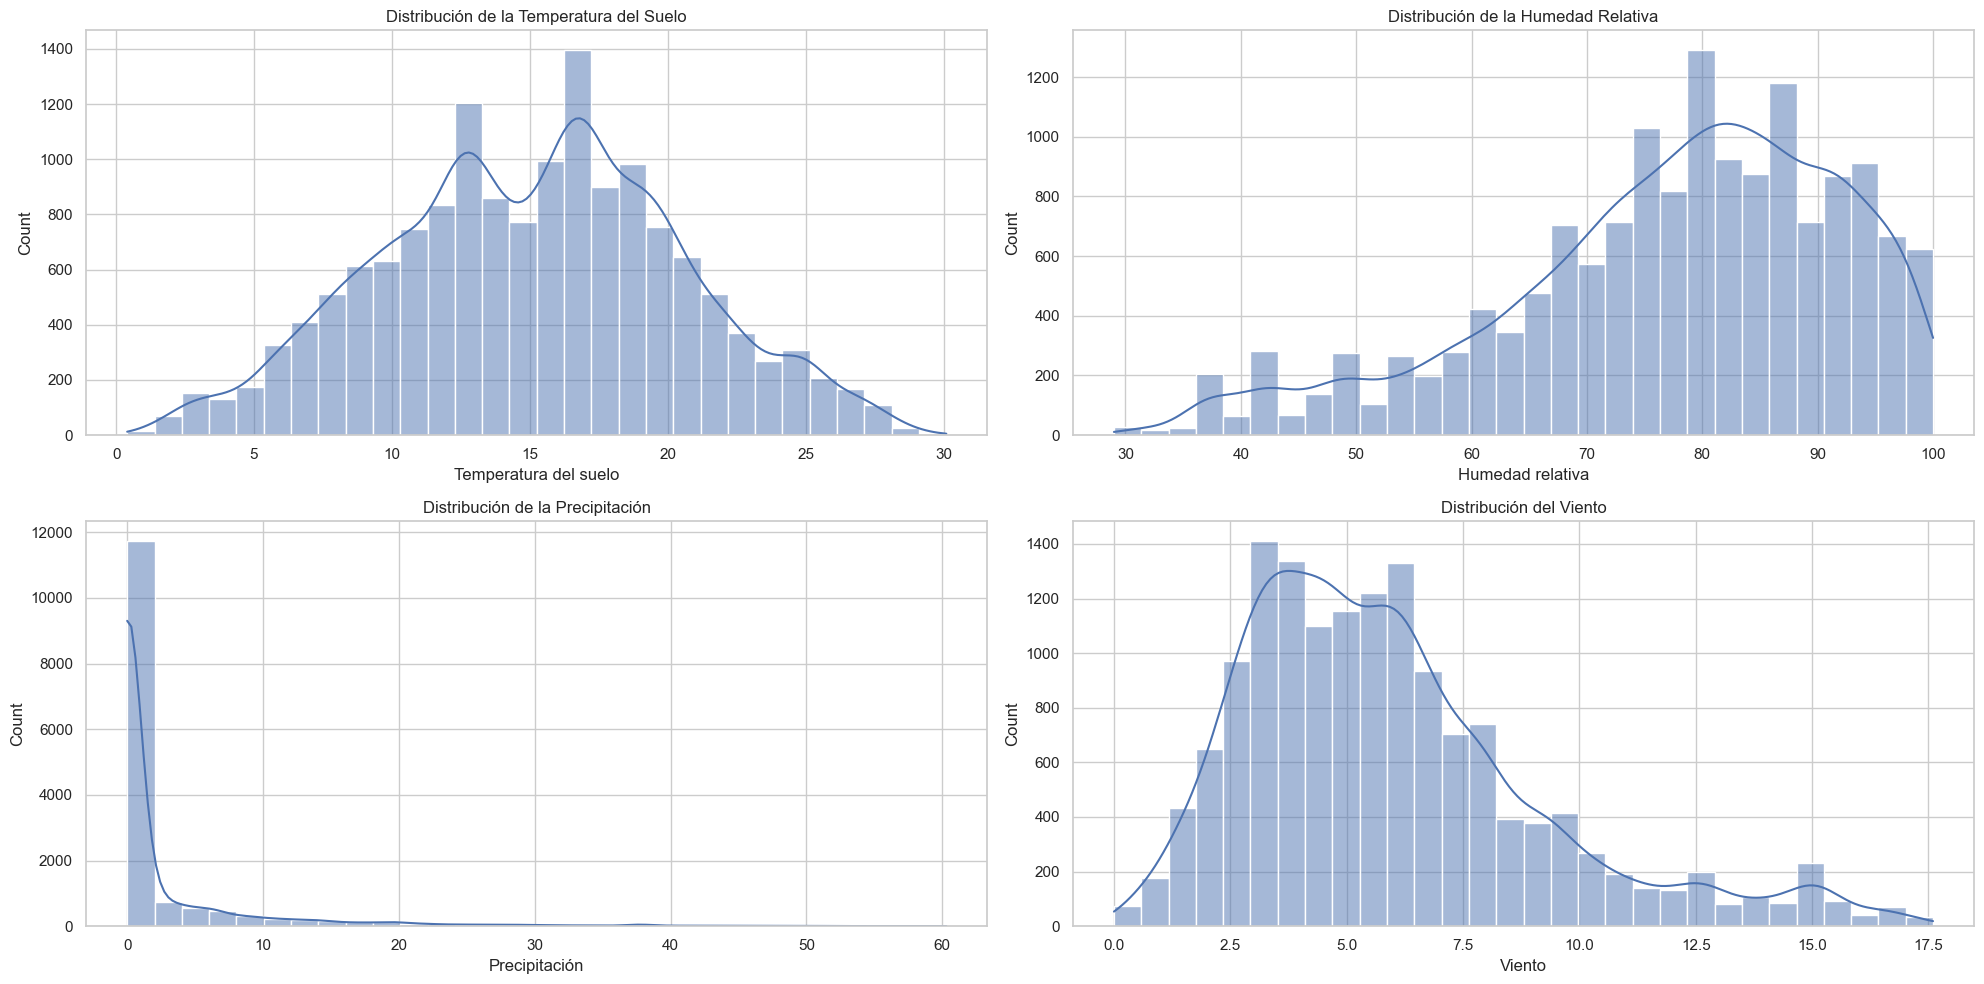

In [2]:
# Configuración para visualizaciones
sns.set(style="whitegrid")

# Visualización de distribuciones para algunas variables clave
plt.figure(figsize=(20, 10))

# Temperatura del Suelo
plt.subplot(2, 2, 1)
sns.histplot(df['Temperatura del suelo'], bins=30, kde=True)
plt.title('Distribución de la Temperatura del Suelo')

# Humedad Relativa
plt.subplot(2, 2, 2)
sns.histplot(df['Humedad relativa'], bins=30, kde=True)
plt.title('Distribución de la Humedad Relativa')

# Precipitación
plt.subplot(2, 2, 3)
sns.histplot(df['Precipitación'], bins=30, kde=True)
plt.title('Distribución de la Precipitación')

# Viento
plt.subplot(2, 2, 4)
sns.histplot(df['Viento'], bins=30, kde=True)
plt.title('Distribución del Viento')

plt.tight_layout()
plt.show()

# Resumen: Las visualizaciones nos proporcionan una comprensión más profunda de las 
# distribuciones de variables clave como la temperatura del suelo, la humedad relativa, 
# la precipitación y el viento. Estas visualizaciones son cruciales para identificar 
# patrones y anomalías en los datos.


Parte 3: Mapa de Calor de Correlaciones y Visualización de Correlaciones en Lista

- Aquí, exploraremos las correlaciones entre las variables numéricas mediante un mapa de calor y crearemos algunas visualizaciones adicionales para comprender mejor las relaciones entre las variables.

/var/folders/7s/xkdgs46x3k5636bxx89xwtqh0000gn/T/ipykernel_1391/3740800651.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


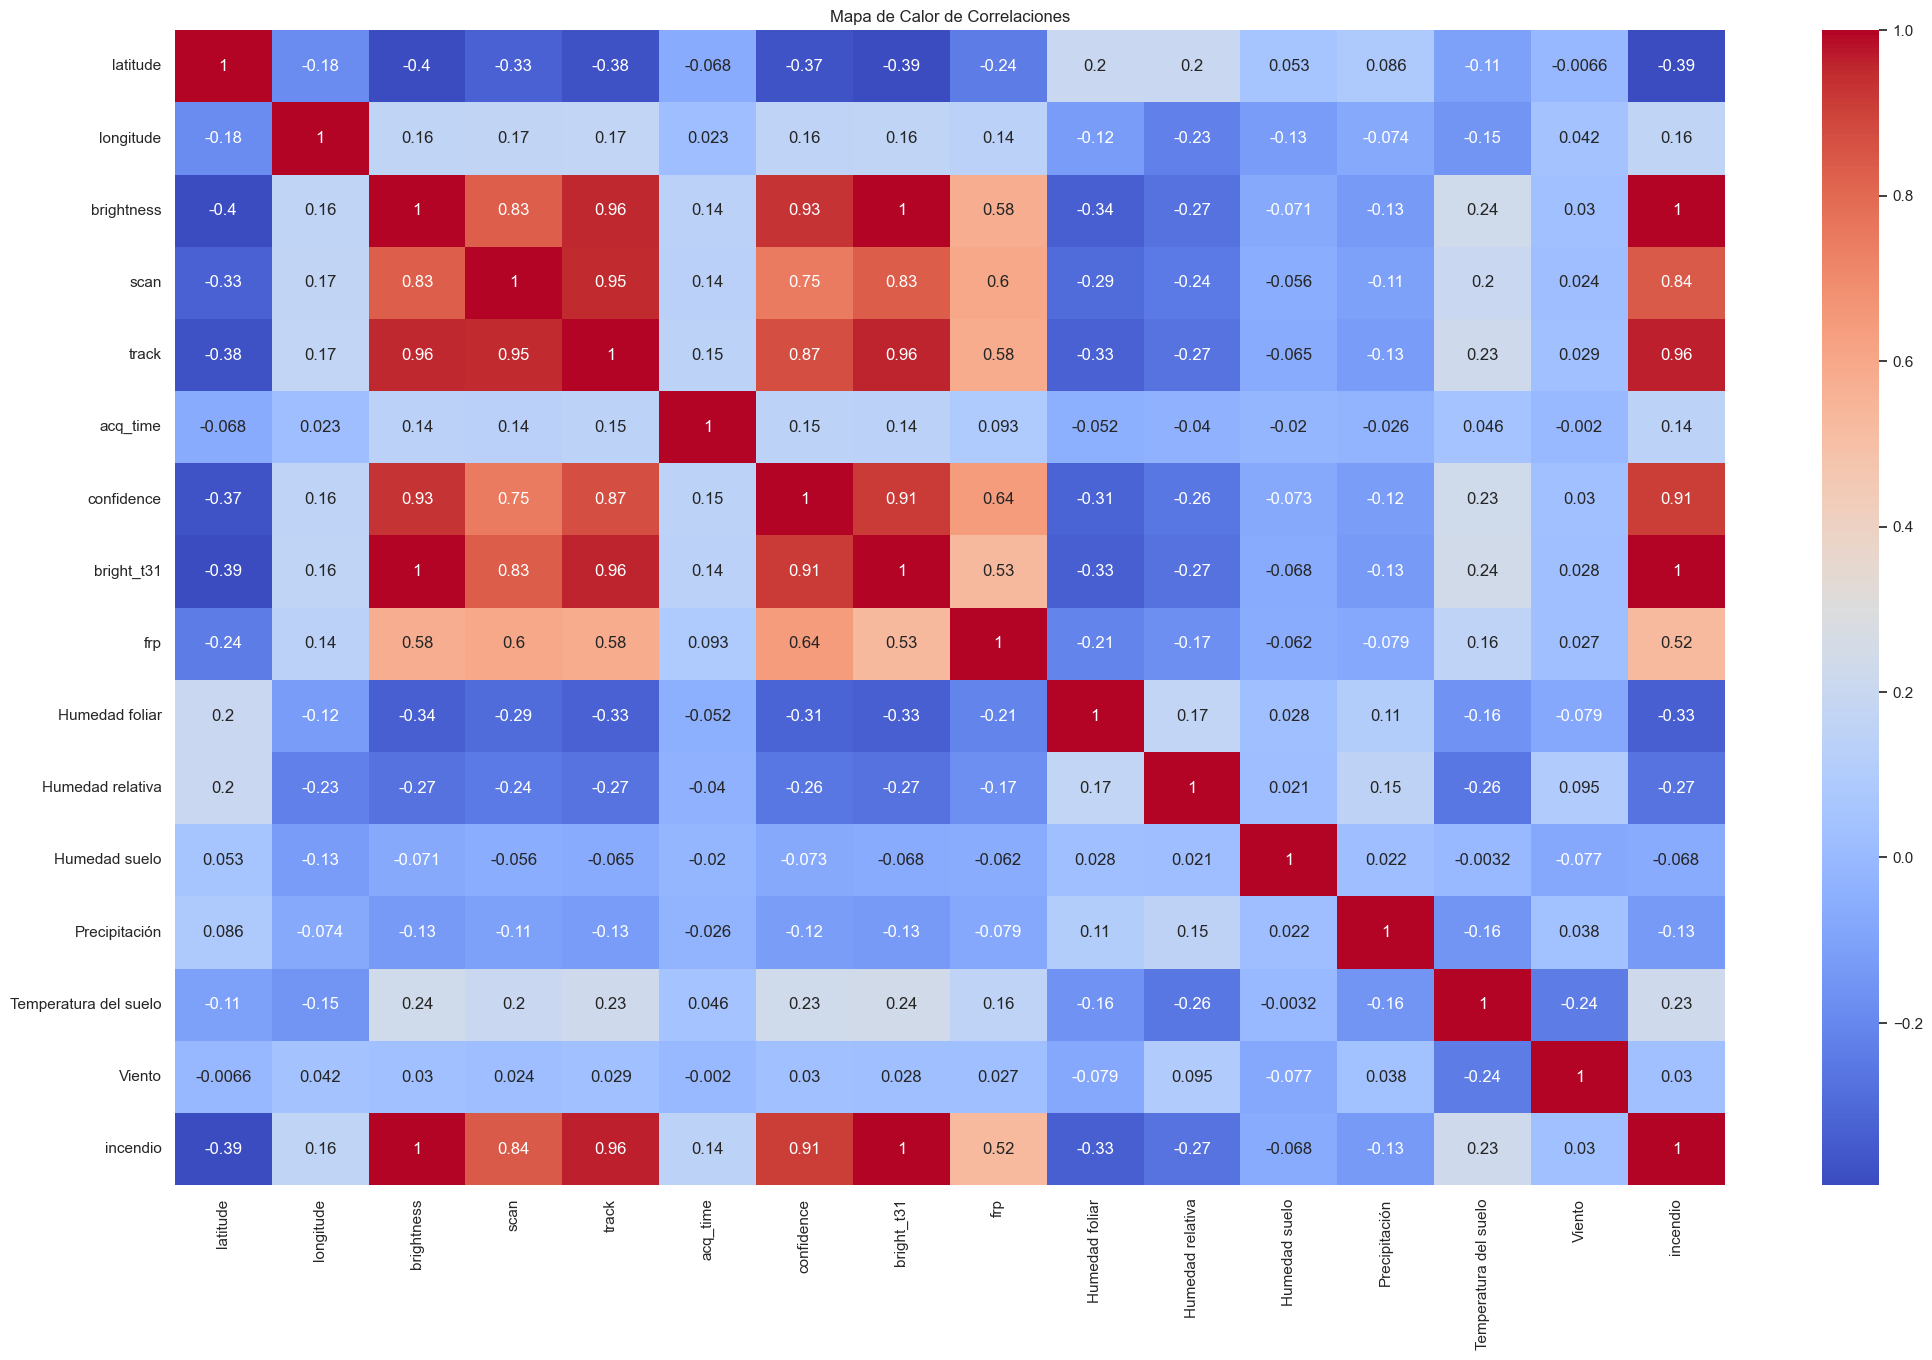

Correlaciones fuertes ordenadas de mayor a menor:
incendio    bright_t31    0.999085
bright_t31  brightness    0.996844
brightness  incendio      0.996243
incendio    track         0.963647
track       bright_t31    0.961736
            brightness    0.956140
            scan          0.950665
brightness  confidence    0.930749
bright_t31  confidence    0.912805
confidence  incendio      0.912038
            track         0.869978
incendio    scan          0.837298
scan        bright_t31    0.834413
            brightness    0.826720
            confidence    0.746191
frp         confidence    0.644141
            scan          0.599911
track       frp           0.580219
brightness  frp           0.576588
frp         bright_t31    0.529800
            incendio      0.523058
dtype: float64


/var/folders/7s/xkdgs46x3k5636bxx89xwtqh0000gn/T/ipykernel_1391/3740800651.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df.corr().unstack().sort_values(ascending=False)


In [3]:
# Mapa de calor para correlaciones
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Extraer y ordenar las correlaciones en forma de lista
correlaciones = df.corr().unstack().sort_values(ascending=False)

# Eliminar correlaciones duplicadas y autocorrelaciones (correlaciones de una variable consigo misma)
correlaciones_filtradas = correlaciones[(correlaciones < 1) & (correlaciones.abs() > 0.5)].drop_duplicates()

print("Correlaciones fuertes ordenadas de mayor a menor:")
print(correlaciones_filtradas)

# Resumen: El mapa de calor de correlaciones nos ayuda a identificar relaciones 
# entre las variables. Las correlaciones fuertes, ya sean positivas o negativas, 
# son de particular interés para un análisis más detallado y para la modelización. 
# Hemos listado estas correlaciones fuertes para facilitar su exploración y análisis.

Parte 4: Análisis Temporal de Incendios

- En esta sección, convertiremos la columna 'Fecha' a formato de fecha y extraeremos información relevante para analizar la frecuencia de incendios a lo largo del tiempo.

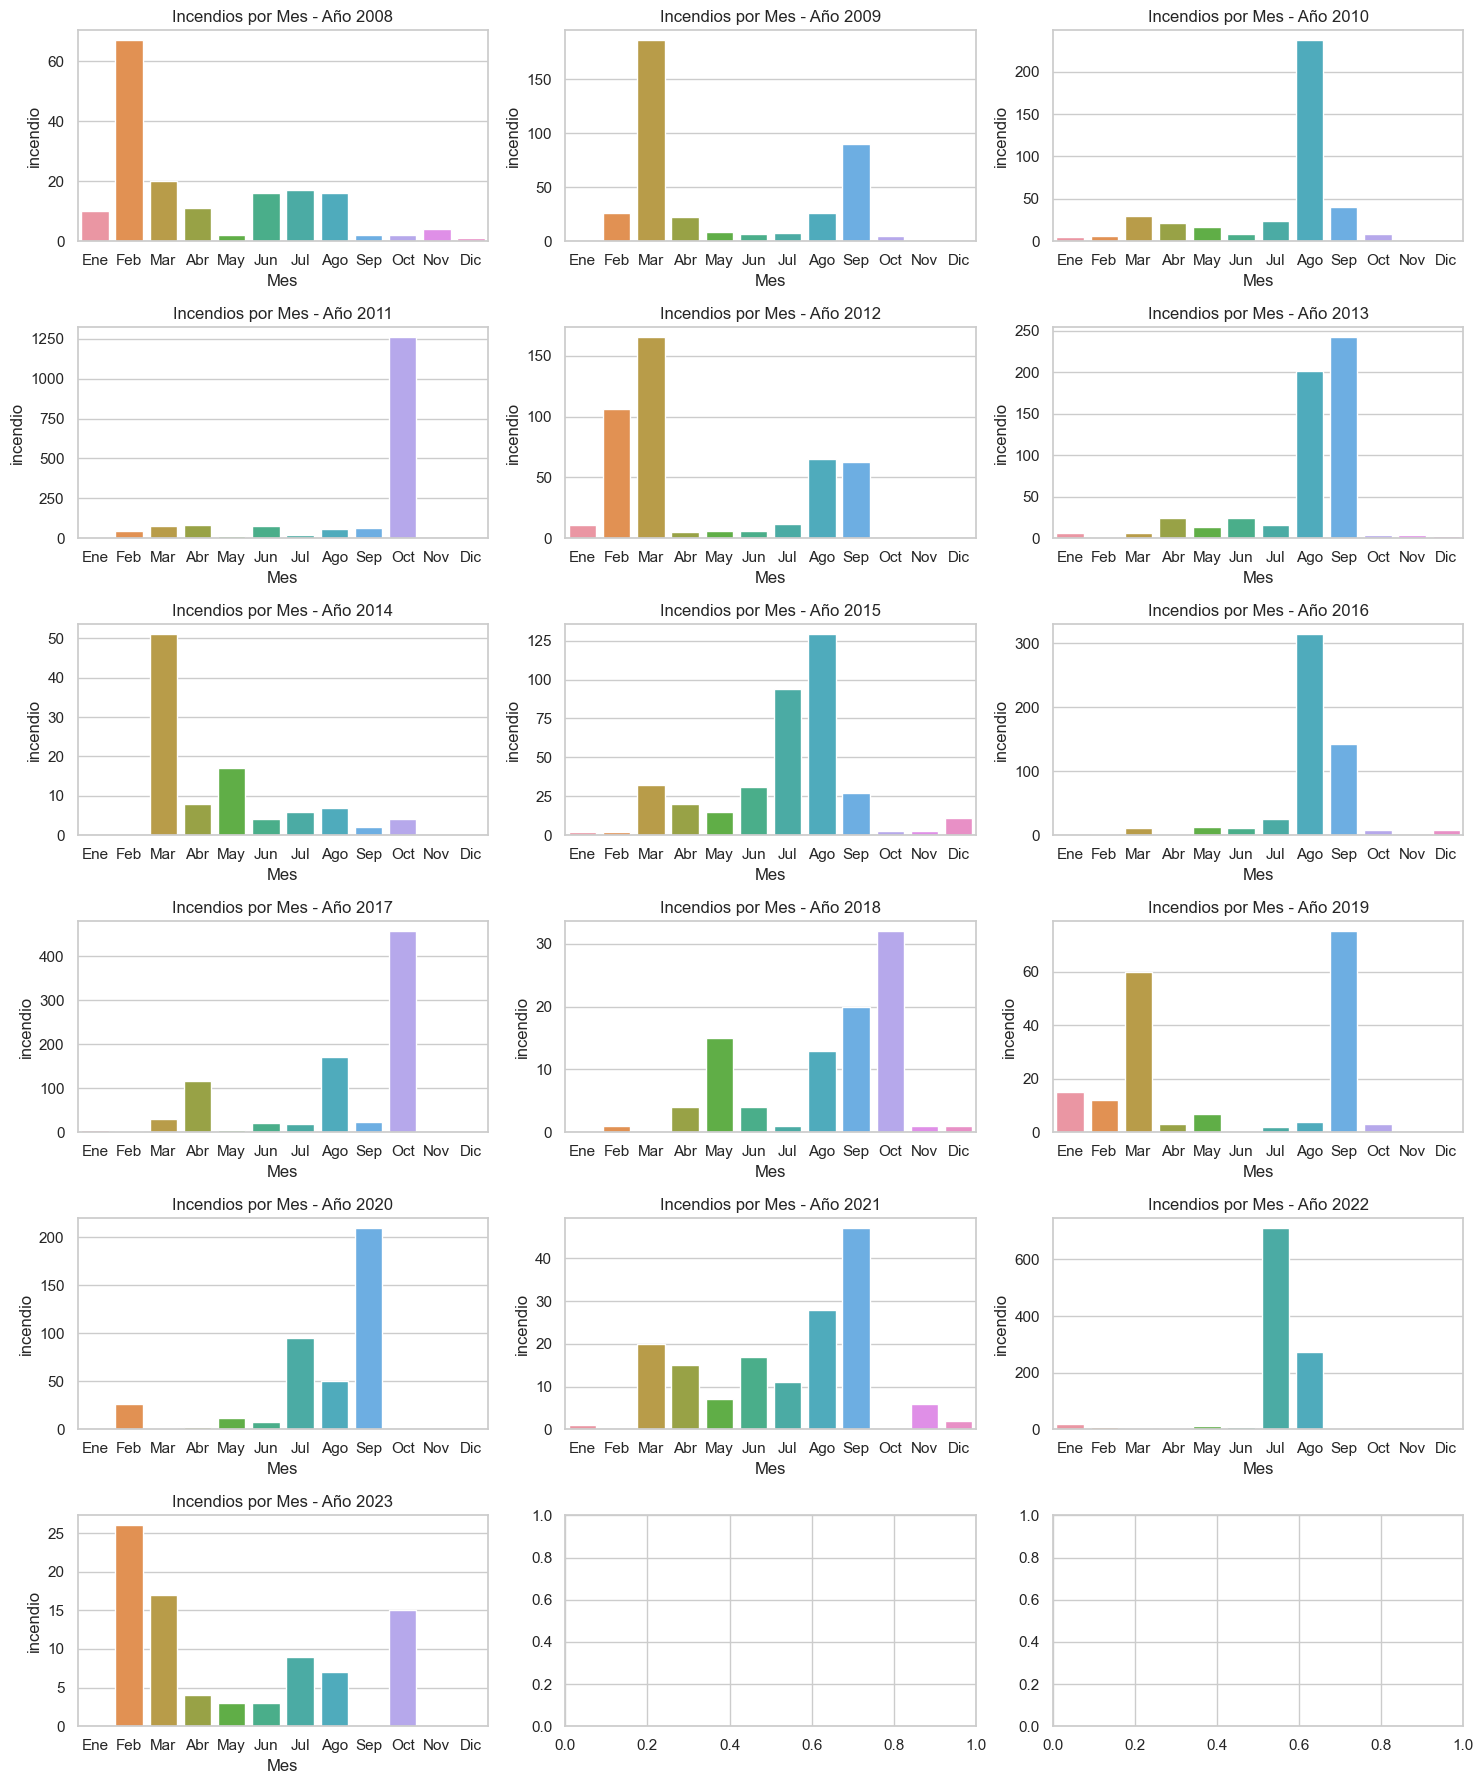

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'Fecha' a formato de fecha y extraer información relevante
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

# Lista de años únicos en el dataset
años = df['Año'].unique()

# Calcular el número de filas y columnas para los subplots
num_años = len(años)
filas = num_años // 3
if num_años % 3 != 0:
    filas += 1
columnas = min(num_años, 3)  # Asegura que no haya más de 3 columnas

# Crear figura y ejes para los subplots
fig, axes = plt.subplots(filas, columnas, figsize=(15, 3 * filas))

# Iterar sobre cada año para crear un gráfico de barras
for i, año in enumerate(años):
    fila = i // columnas
    columna = i % columnas
    ax = axes[fila, columna] if filas > 1 else axes[columna]
    data_año = df[df['Año'] == año]
    incendios_por_mes = data_año.groupby('Mes')['incendio'].sum().reset_index()

    # Comprobar si hay datos para el año
    if not incendios_por_mes.empty:
        sns.barplot(x='Mes', y='incendio', data=incendios_por_mes, ax=ax)
        ax.set_title(f'Incendios por Mes - Año {año}')
        ax.set_xticks(range(12))
        ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()


# Resumen: Hemos analizado la frecuencia de incendios a lo largo del tiempo, 
# lo que puede proporcionar información valiosa sobre patrones estacionales o 
# tendencias anuales en la ocurrencia de incendios.


Parte 5: Exploración de la Variable daynight y Análisis de Correlación con Variables Satelitales

- Esta parte del análisis se centra en la variable daynight y en cómo las características satelitales se correlacionan con la ocurrencia de incendios.

Distribución de la variable día/noche:
 D    7621
N    7479
Name: daynight, dtype: int64


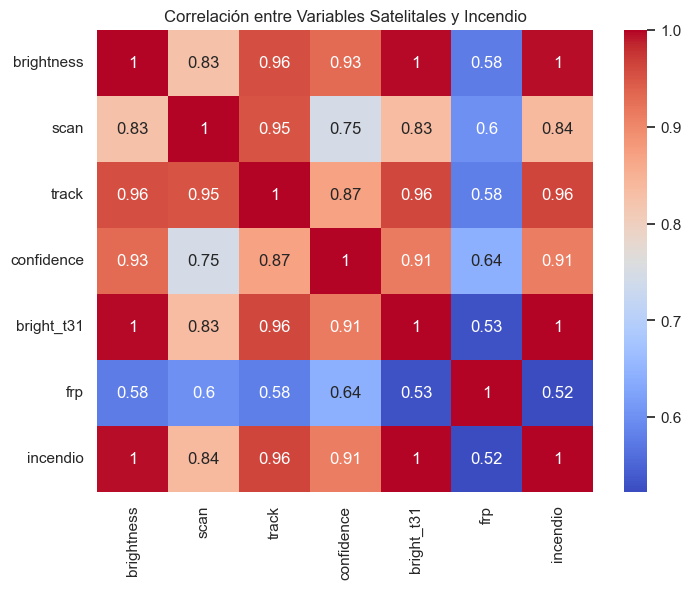

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
df = pd.read_csv(file_path)

# Explorar la distribución de la variable día/noche
day_night_counts = df['daynight'].value_counts()

# Evaluar la relación entre las variables satelitales y la variable objetivo 'incendio'
satellite_features = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
correlations = df[satellite_features + ['incendio']].corr()

# Visualizar la relación entre las variables satelitales y la variable objetivo
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Satelitales y Incendio')

# Imprimir los resultados
print("Distribución de la variable día/noche:\n", day_night_counts)

# Resumen: Hemos explorado la distribución de la variable 'daynight' y analizado 
# cómo se relacionan las variables satelitales con la ocurrencia de incendios. 
# Este análisis ayuda a identificar qué características son más relevantes para predecir incendios.


Sección de Incendios por Hora

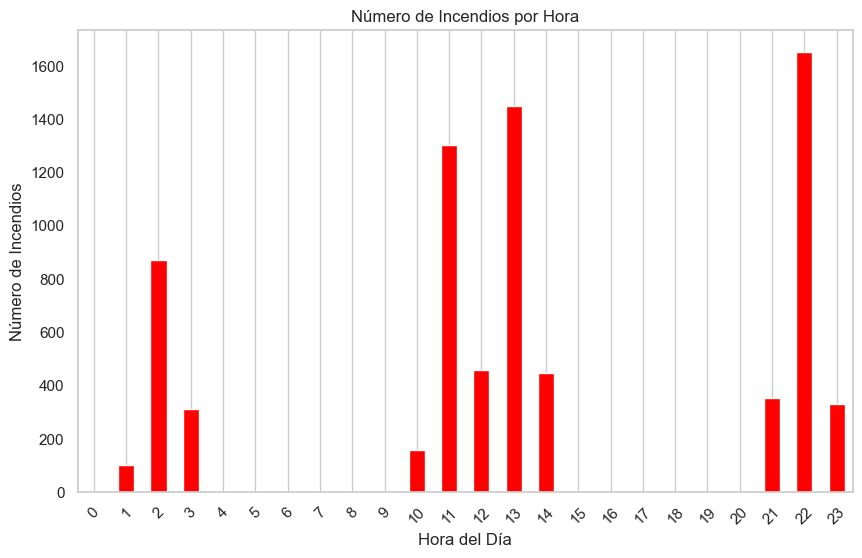

In [6]:
# Si 'acq_time' es un número entero que representa HHMM, por ejemplo, 1330 para 1:30 PM
df['Hora'] = df['acq_time'] // 100  # Esto extraerá la hora

# Ahora agrupa por la columna 'Hora' y cuenta el número de incendios
incendios_por_hora = df.groupby('Hora')['incendio'].sum()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
incendios_por_hora.plot(kind='bar', color='red')
plt.title('Número de Incendios por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Incendios')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Comparación de Medias para Variables Clave

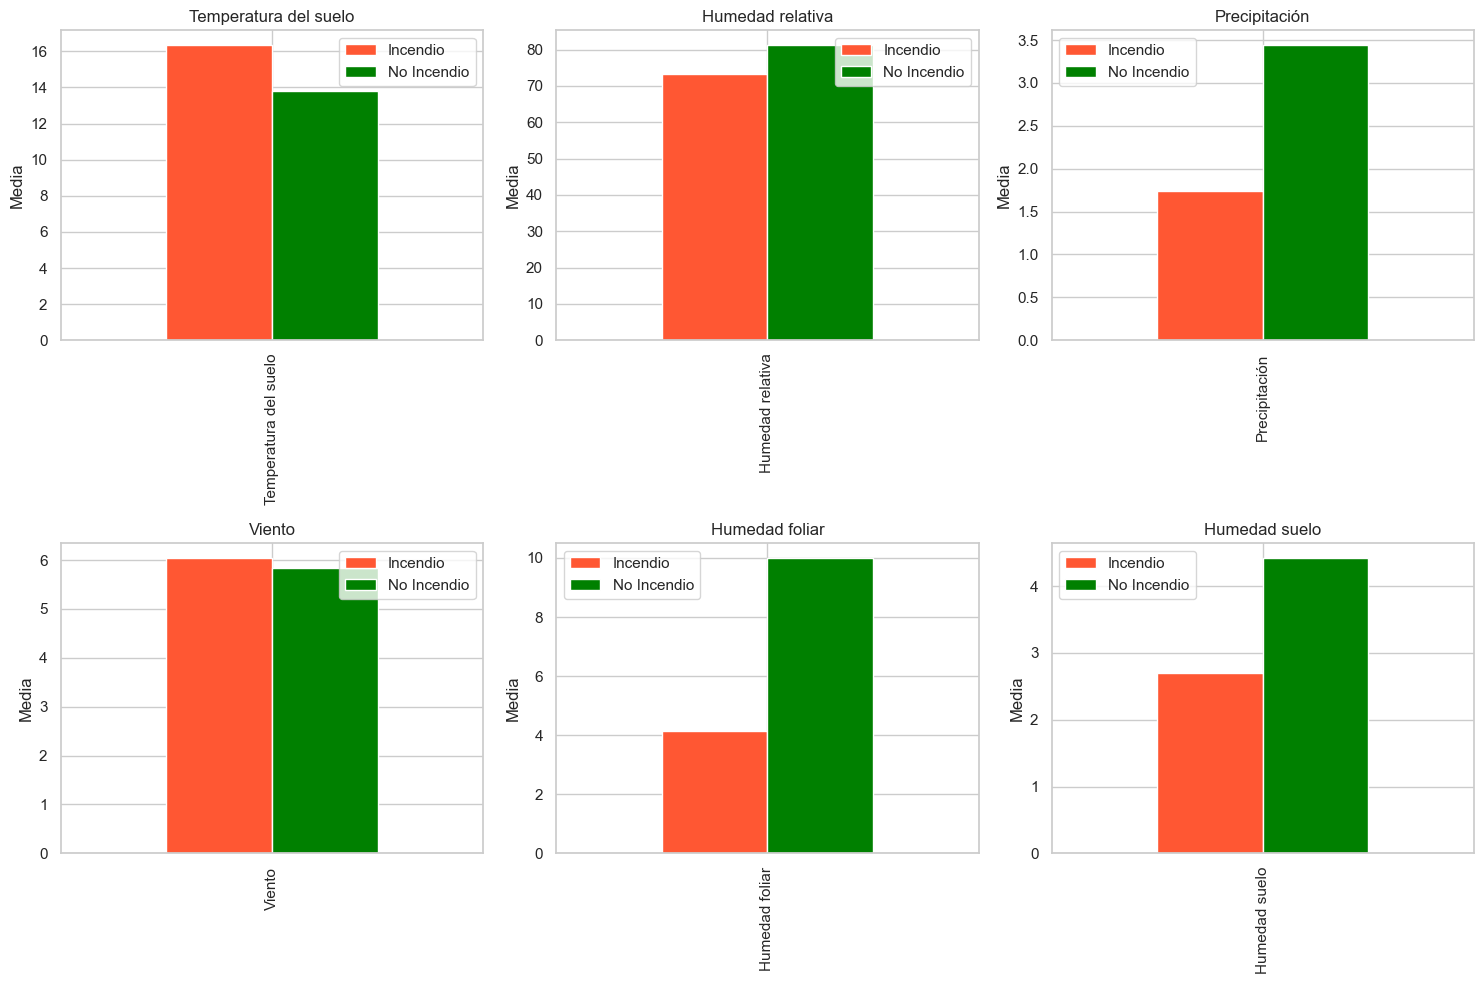

In [7]:
variables = ['Temperatura del suelo', 'Humedad relativa', 'Precipitación', 'Viento', 'Humedad foliar', 'Humedad suelo']

# Crear un diccionario para almacenar las medias
means = {'Incendio': [], 'No Incendio': []}

for variable in variables:
    # Calcular la media cuando hay incendio
    mean_incendio = df[df['incendio'] == 1][variable].mean()
    means['Incendio'].append(mean_incendio)

    # Calcular la media cuando no hay incendio
    mean_no_incendio = df[df['incendio'] == 0][variable].mean()
    means['No Incendio'].append(mean_no_incendio)

# Crear un DataFrame con las medias
means_df = pd.DataFrame(means, index=variables)

# Graficar las medias en subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
colors = ['green', '#FF5733']  # Verde para 'No Incendio' y rojizo-naranja para 'Incendio'

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3

    means_df.loc[[variable]].plot(kind='bar', ax=axs[row, col], color=colors[::-1])  # Invertir el orden de los colores
    axs[row, col].set_title(variable)
    axs[row, col].set_ylabel('Media')
    axs[row, col].set_xlabel('')

plt.tight_layout()
plt.show()


Pair Plot de Variables Seleccionadas

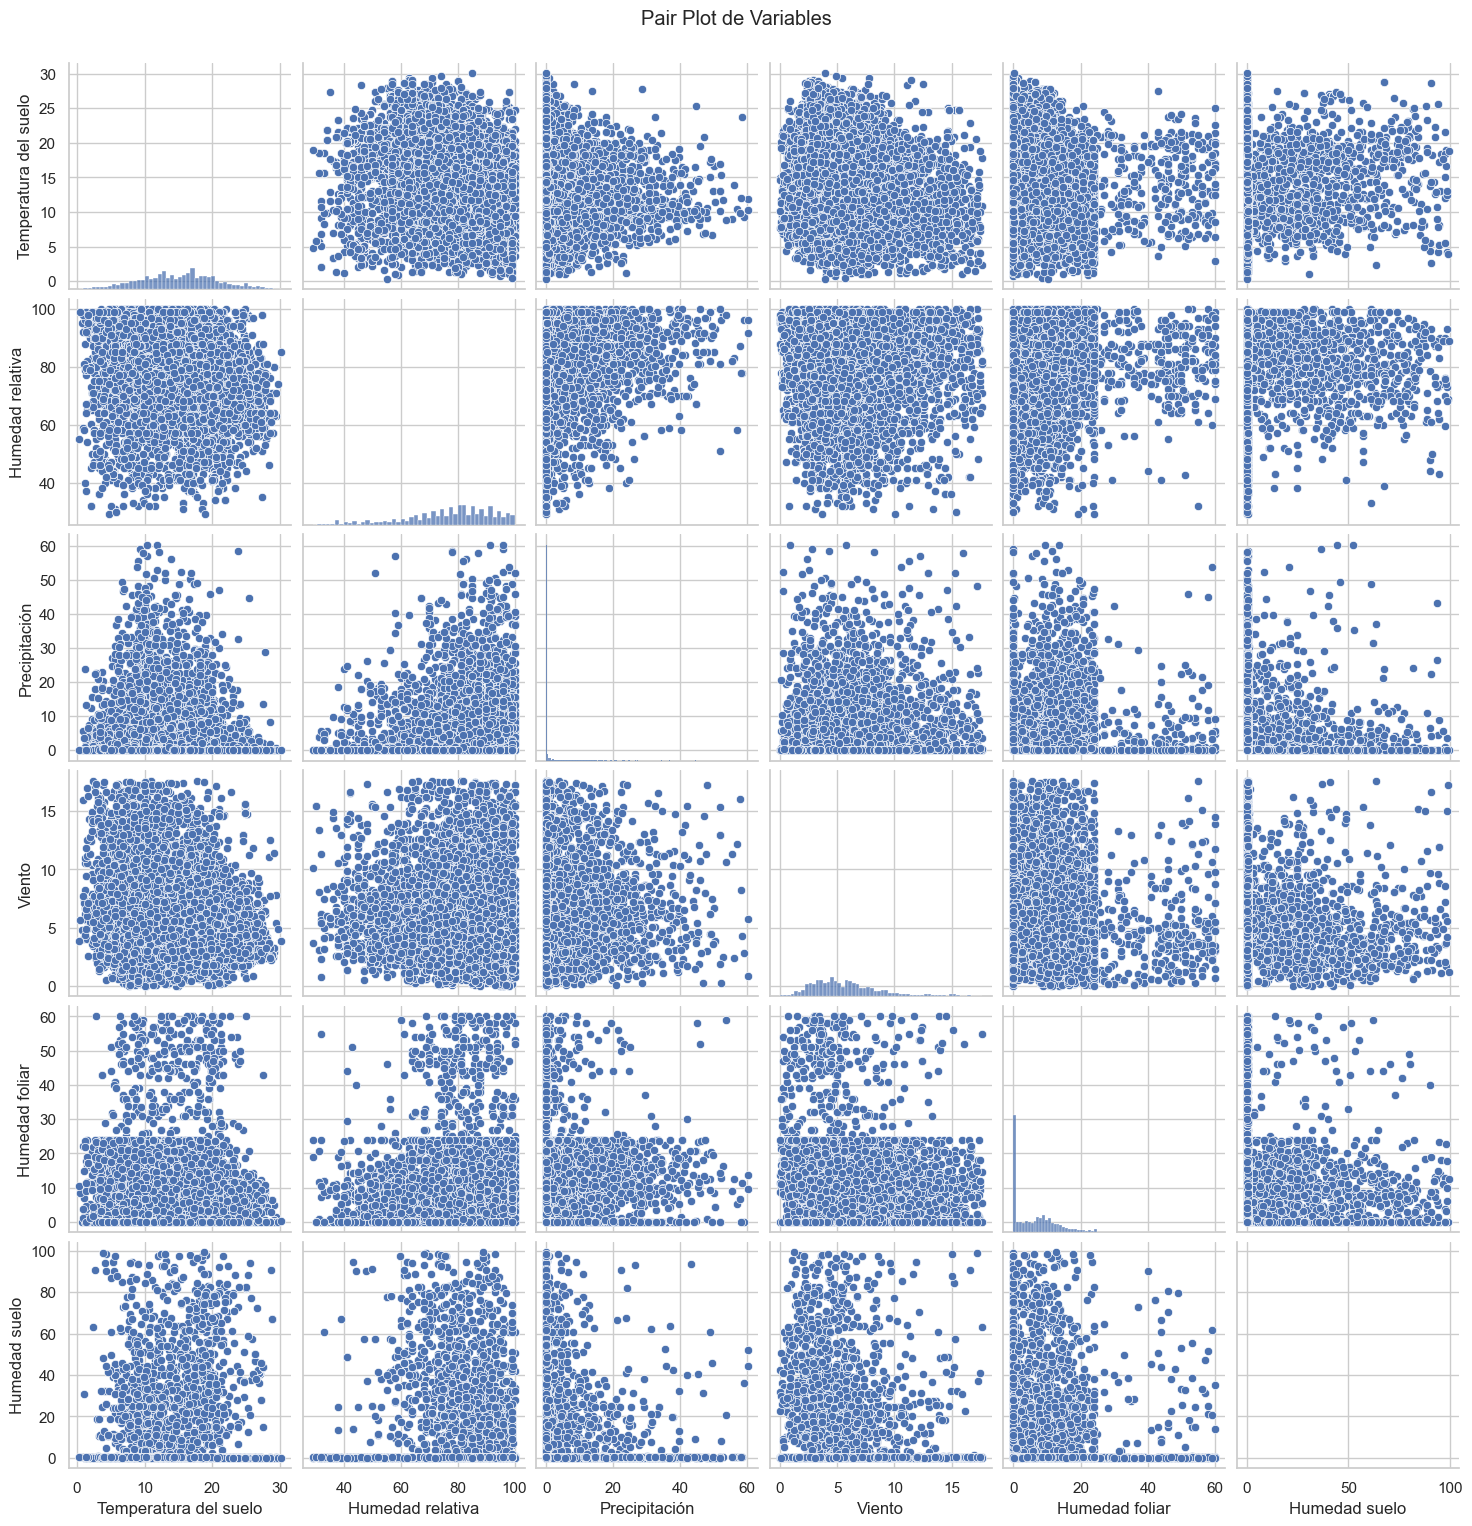

In [8]:
variables = ['Temperatura del suelo', 'Humedad relativa', 'Precipitación', 'Viento', 'Humedad foliar', 'Humedad suelo']

# Seleccionar las columnas especificadas
data = df[variables]

# Crear un pair plot
sns.pairplot(data)
plt.suptitle('Pair Plot de Variables', y=1.02)
plt.show()


Parte 6: Preprocesamiento y Análisis de Multicolinealidad

- En esta parte, realizaremos un preprocesamiento adicional y evaluaremos la multicolinealidad entre las variables satelitales, lo cual es crucial para evitar problemas en modelos predictivos futuros.

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Corrección de la variable 'daynight' utilizando 'acq_time'
df['Hora'] = df['acq_time'] // 100  # Extraer la hora de 'acq_time'
df['daynight'] = df['daynight'].replace({'0': None})
df.loc[df['daynight'].isna(), 'daynight'] = df.loc[df['daynight'].isna(), 'Hora'].apply(lambda x: 'D' if 6 <= x <= 18 else 'N')

print("Corrección de 'daynight':")
print(df['daynight'].value_counts())

# 2. Análisis de multicolinealidad de las variables satelitales
X_numeric = df[satellite_features].dropna()
VIF_data = pd.DataFrame()
VIF_data['feature'] = X_numeric.columns
VIF_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(len(X_numeric.columns))]
print("\nAnálisis de multicolinealidad:")
print(VIF_data)

# Resumen: Hemos realizado un preprocesamiento adicional en la variable 'daynight' 
# y hemos evaluado la multicolinealidad entre las variables satelitales. 
# La identificación de alta multicolinealidad puede ser un indicador de que algunas variables 
# deben ser excluidas o transformadas antes de proceder con el modelado.


Corrección de 'daynight':
D    7621
N    7479
Name: daynight, dtype: int64

Análisis de multicolinealidad:
      feature          VIF
0  brightness  1177.330465
1        scan   171.365453
2       track   722.649178
3  confidence    18.475531
4  bright_t31  1154.477703
5         frp     6.134266


Un VIF superior a 5-10 suele considerarse indicativo de multicolinealidad significativa. 
En este caso, brightness, scan, track, y bright_t31 tienen VIFs altos, lo cual sugiere que podrían necesitar ser eliminadas o transformadas antes del modelado.
Por lo que finalmente decidimos quitar todas las variables satelitales.

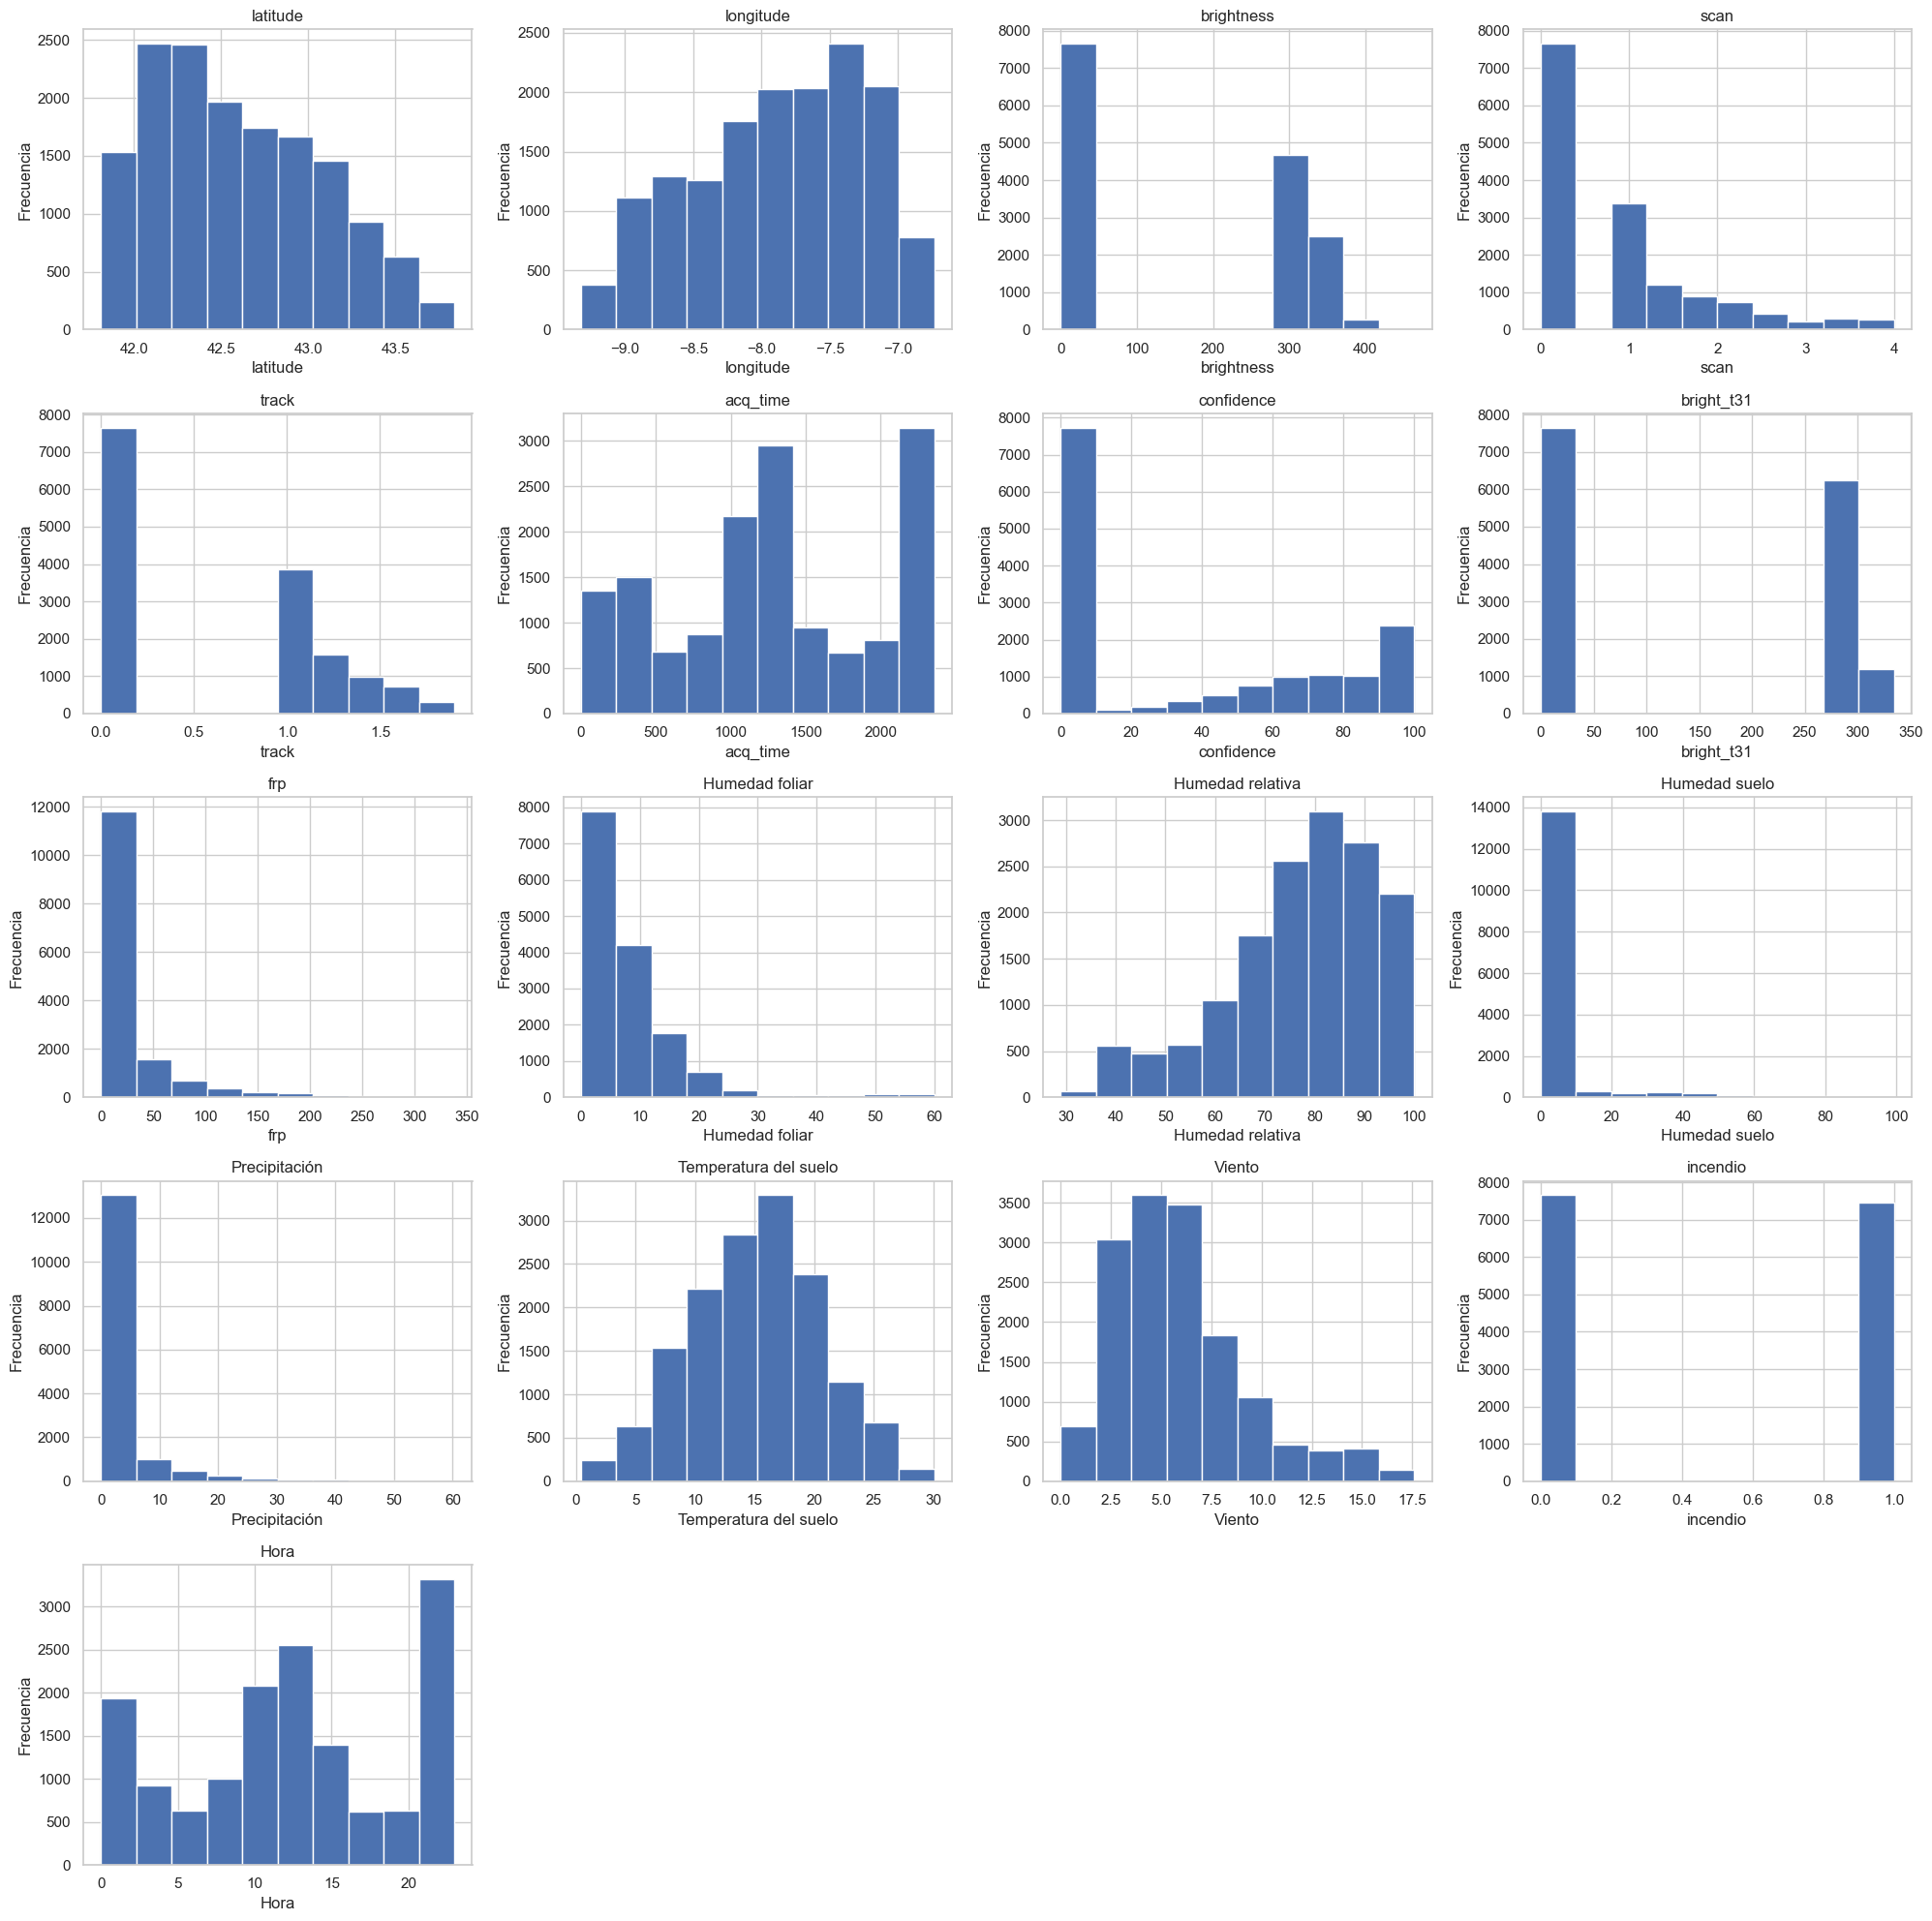

In [10]:
# Seleccionar solo las columnas numéricas para el análisis
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Configurar el tamaño de la figura para los histogramas
plt.figure(figsize=(20, 20))

# Crear un histograma para cada columna numérica
for i, columna in enumerate(columnas_numericas):
    plt.subplot(len(columnas_numericas) // 4 + 1, 4, i + 1)
    df[columna].hist()
    plt.title(columna)
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")

# Ajustar la disposición y mostrar los histogramas
plt.tight_layout()
plt.show()

Parte 7: Limpieza y Ajuste Final del Dataset

- Esta parte se enfoca en la limpieza final del dataset, eliminando las columnas que no serán necesarias para los análisis o modelados futuros, y luego guardando el dataset ajustado.

In [11]:
print(df.columns.tolist(), "\n")

['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date', 'acq_time', 'confidence', 'bright_t31', 'frp', 'daynight', 'location_info', 'Provincia', 'Comunidad_Autonoma', 'Estacion', 'Fecha', 'Humedad foliar', 'Humedad relativa', 'Humedad suelo', 'Precipitación', 'Temperatura del suelo', 'Viento', 'incendio', 'municipio', 'Hora'] 



In [12]:
#Convertir la columna 'Fecha' a un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer el mes y crear una nueva columna
df['Mes'] = df['Fecha'].dt.month

# Convertir el mes a una variable categórica
df['Mes'] = df['Mes'].astype('category')

# Lista de columnas a eliminar
columnas_a_eliminar = ['bright_t31', 'brightness', 'track', 'confidence', 'scan', 'frp', 'Hora', 'acq_time'] 

# Eliminar las columnas del DataFrame
df_limpio = df.drop(columns=columnas_a_eliminar)

# Opcional: Guardar el DataFrame limpio en un nuevo archivo CSV
ruta_nuevo_csv = 'Data/data_Galicia/dataset_unificado_imputed_ajustado_limpio.csv'
df_limpio.to_csv(ruta_nuevo_csv, index=False)

# Resumen: Hemos realizado una limpieza final del dataset, añadiendo una columna de 'Mes' como variable categórica y eliminando columnas no relevantes o redundantes. El dataset limpio ha sido guardado para su uso en etapas posteriores.
# que podrían no ser relevantes o redundantes para el análisis. El dataset limpio 
# ha sido guardado para su uso en etapas posteriores.


In [13]:
df_limpio

,latitude,longitude,acq_date,daynight,location_info,Provincia,Comunidad_Autonoma,Estacion,Fecha,Humedad foliar,Humedad relativa,Humedad suelo,Precipitación,Temperatura del suelo,Viento,incendio,municipio,Mes
0,41.955500,-7.971600,2008-01-25,D,"OU-1205, Muíños, Mugueimes, A Baixa Limia, Our...",Ourense,Galicia,calvos de randin,2008-01-25,13.0,73.0,38.9,0.0,5.3,5.0,1,NaN,1
1,42.209200,-7.237900,2008-01-27,D,"O Curro, Chaguazoso, Vilariño de Conso, Viana,...",Ourense,Galicia,a veiga,2008-01-27,0.0,62.0,0.0,0.0,3.3,14.0,1,NaN,1
2,42.216700,-7.245400,2008-01-27,D,"Os Forcados, Chaguazoso, Vilariño de Conso, Vi...",Ourense,Galicia,a veiga,2008-01-27,0.0,62.0,0.0,0.0,3.3,14.0,1,NaN,1
3,41.971600,-7.034800,2008-01-27,D,"Chaguazoso, A Mezquita, Viana, Ourense, Galici...",Ourense,Galicia,rios,2008-01-27,0.0,78.0,0.3,19.4,5.5,5.3,1,NaN,1
4,41.973400,-7.022800,2008-01-27,D,"Chaguazoso, A Mezquita, Viana, Ourense, Galici...",Ourense,Galicia,rios,2008-01-27,0.0,78.0,0.3,19.4,5.5,5.3,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,41.866827,-7.453686,2012-03-13,D,"Tamaguelos, San Cibrao, Verín, Ourense, Galici...",Ourense,Galicia,rios,2012-03-13,0.0,57.0,0.3,3.2,10.2,10.7,0,NaN,3
15096,42.291368,-8.277369,2018-07-30,D,"Boca dos Acevedos, Prado, Covelo, A Paradanta,...",Pontevedra,Galicia,castrelo de mino,2018-07-30,0.1,72.0,0.0,0.0,23.1,3.1,0,NaN,7
15097,43.600801,-7.600368,2016-02-06,D,"Os Rubeiras, Merille, Ourol, A Mariña Occident...",Lugo,Galicia,mondonedo,2016-02-06,10.4,88.0,0.5,27.8,8.7,4.9,0,NaN,2
15098,43.089310,-8.695600,2017-05-25,N,"AC-400, O Carballal, Erbecedo, Coristanco, Ber...",A Coruña,Galicia,val do dubra,2017-05-25,4.1,96.0,0.2,14.4,17.3,7.2,0,NaN,5


Parte 8: Análisis Descriptivo y Correlacional Detallado

- En esta sección, realizaremos un análisis descriptivo más detallado y exploraremos la matriz de correlación después de la limpieza para identificar relaciones significativas entre las variables.

/var/folders/7s/xkdgs46x3k5636bxx89xwtqh0000gn/T/ipykernel_1391/2439254946.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones_completas = df_limpio.corr()


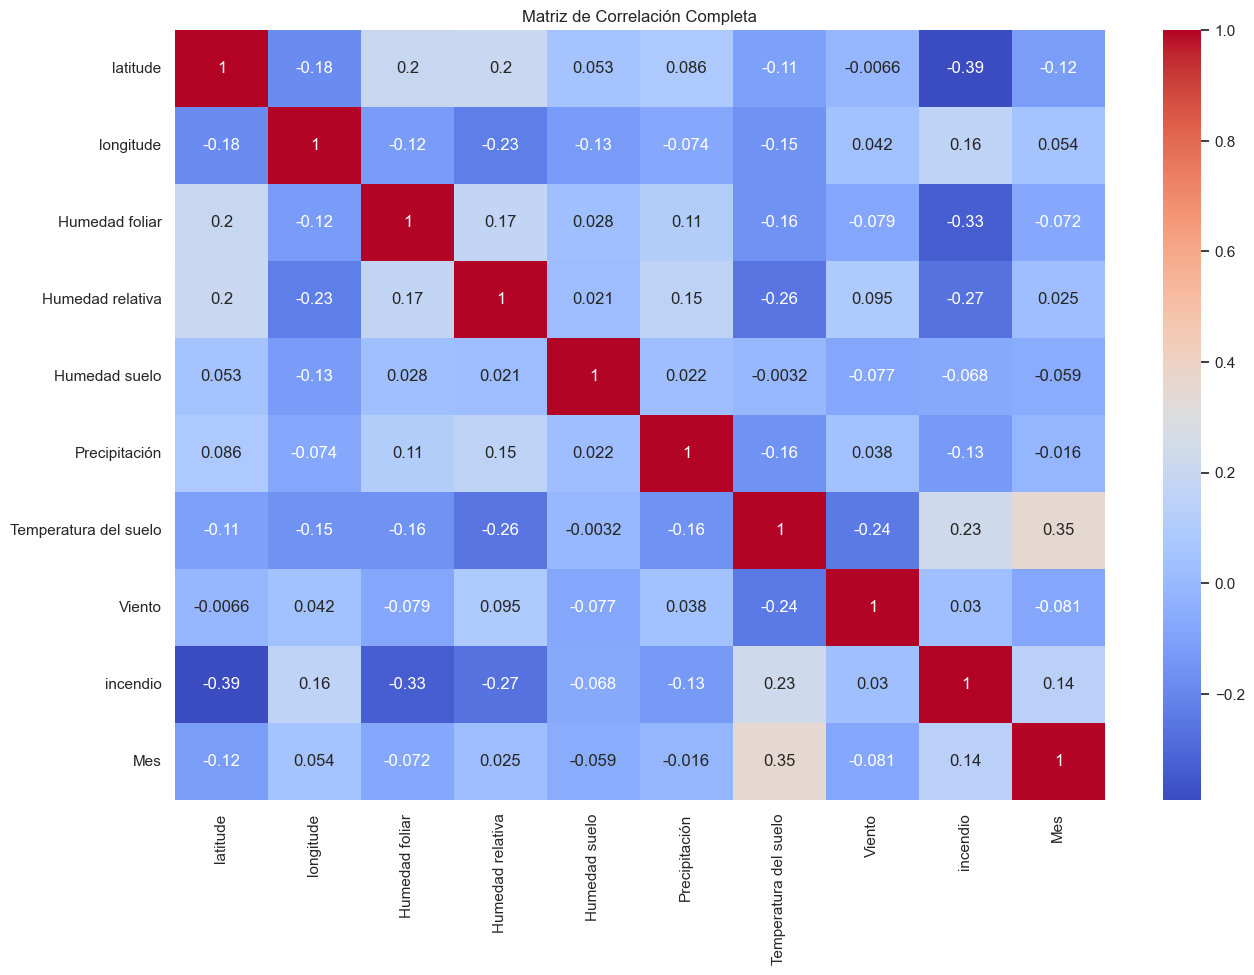


Correlaciones con la variable objetivo 'incendio' después de la limpieza:
incendio                 1.000000
Temperatura del suelo    0.230728
longitude                0.160941
Mes                      0.139133
Viento                   0.029991
Humedad suelo           -0.067509
Precipitación           -0.129449
Humedad relativa        -0.268533
Humedad foliar          -0.332803
latitude                -0.392210
Name: incendio, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
ruta_del_dataset = 'Data/data_Galicia/dataset_unificado_imputed_ajustado_limpio.csv'
df_limpio = pd.read_csv(ruta_del_dataset)

# Asegurarse de que 'Mes' es una variable numérica
df_limpio['Mes'] = pd.to_datetime(df_limpio['Fecha']).dt.month

# Calcular la matriz de correlación completa
correlaciones_completas = df_limpio.corr()

# Visualizar la matriz de correlación completa
plt.figure(figsize=(15, 10))
sns.heatmap(correlaciones_completas, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación Completa")
plt.show()

# Imprimir las correlaciones más fuertes con la variable objetivo
correlaciones_objetivo = correlaciones_completas['incendio'].sort_values(ascending=False)
print("\nCorrelaciones con la variable objetivo 'incendio' después de la limpieza:")
print(correlaciones_objetivo)

# Resumen: Este análisis nos ha permitido identificar las relaciones más fuertes 
# entre las variables restantes y la variable objetivo 'incendio'. 
# Estos hallazgos son esenciales para comprender los factores que pueden influir 
# en la ocurrencia de incendios.


In [15]:
df_limpio

,latitude,longitude,acq_date,daynight,location_info,Provincia,Comunidad_Autonoma,Estacion,Fecha,Humedad foliar,Humedad relativa,Humedad suelo,Precipitación,Temperatura del suelo,Viento,incendio,municipio,Mes
0,41.955500,-7.971600,2008-01-25,D,"OU-1205, Muíños, Mugueimes, A Baixa Limia, Our...",Ourense,Galicia,calvos de randin,2008-01-25,13.0,73.0,38.9,0.0,5.3,5.0,1,NaN,1
1,42.209200,-7.237900,2008-01-27,D,"O Curro, Chaguazoso, Vilariño de Conso, Viana,...",Ourense,Galicia,a veiga,2008-01-27,0.0,62.0,0.0,0.0,3.3,14.0,1,NaN,1
2,42.216700,-7.245400,2008-01-27,D,"Os Forcados, Chaguazoso, Vilariño de Conso, Vi...",Ourense,Galicia,a veiga,2008-01-27,0.0,62.0,0.0,0.0,3.3,14.0,1,NaN,1
3,41.971600,-7.034800,2008-01-27,D,"Chaguazoso, A Mezquita, Viana, Ourense, Galici...",Ourense,Galicia,rios,2008-01-27,0.0,78.0,0.3,19.4,5.5,5.3,1,NaN,1
4,41.973400,-7.022800,2008-01-27,D,"Chaguazoso, A Mezquita, Viana, Ourense, Galici...",Ourense,Galicia,rios,2008-01-27,0.0,78.0,0.3,19.4,5.5,5.3,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,41.866827,-7.453686,2012-03-13,D,"Tamaguelos, San Cibrao, Verín, Ourense, Galici...",Ourense,Galicia,rios,2012-03-13,0.0,57.0,0.3,3.2,10.2,10.7,0,NaN,3
15096,42.291368,-8.277369,2018-07-30,D,"Boca dos Acevedos, Prado, Covelo, A Paradanta,...",Pontevedra,Galicia,castrelo de mino,2018-07-30,0.1,72.0,0.0,0.0,23.1,3.1,0,NaN,7
15097,43.600801,-7.600368,2016-02-06,D,"Os Rubeiras, Merille, Ourol, A Mariña Occident...",Lugo,Galicia,mondonedo,2016-02-06,10.4,88.0,0.5,27.8,8.7,4.9,0,NaN,2
15098,43.089310,-8.695600,2017-05-25,N,"AC-400, O Carballal, Erbecedo, Coristanco, Ber...",A Coruña,Galicia,val do dubra,2017-05-25,4.1,96.0,0.2,14.4,17.3,7.2,0,NaN,5


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Extracción de un año en concreto del conjunto de datos total para la prueba del modelo en el útlimo notebook

In [16]:
import pandas as pd

# Cargar el dataset original
file_path = 'Data/data_Galicia/dataset_unificado_imputed_ajustado_limpio.csv'
df_original = pd.read_csv(file_path)

# Convertir la columna 'Fecha' a formato de fecha
df_original['Fecha'] = pd.to_datetime(df_original['Fecha'])

# Filtrar el dataset para el año 2022
df_prueba = df_original[df_original['Fecha'].dt.year == 2022]

# Guardar los datos filtrados en un nuevo archivo CSV
ruta_nuevo_csv_prueba = 'Data/data_Galicia/datos_Galicia_prueba_modelo.csv'
df_prueba.to_csv(ruta_nuevo_csv_prueba, index=False)
print("Datos del año elegido guardados en:", ruta_nuevo_csv_prueba)

# Eliminar las filas correspondientes al año 2022 del DataFrame original
df_original = df_original[df_original['Fecha'].dt.year != 2022]

# Guardar el DataFrame original ajustado en un nuevo archivo CSV
ruta_nuevo_csv_original = 'Data/data_Galicia/dataset_unificado_imputed_ajustado_limpio.csv'
df_original.to_csv(ruta_nuevo_csv_original, index=False)
print("DataFrame original ajustado guardado en:", ruta_nuevo_csv_original)


Datos del año elegido guardados en: Data/data_Galicia/datos_Galicia_prueba_modelo.csv
DataFrame original ajustado guardado en: Data/data_Galicia/dataset_unificado_imputed_ajustado_limpio.csv


In [17]:
# Imprimir las columnas del DataFrame df
print("Columnas del DataFrame df:")
print(df_prueba.columns.tolist())


Columnas del DataFrame df:
['latitude', 'longitude', 'acq_date', 'daynight', 'location_info', 'Provincia', 'Comunidad_Autonoma', 'Estacion', 'Fecha', 'Humedad foliar', 'Humedad relativa', 'Humedad suelo', 'Precipitación', 'Temperatura del suelo', 'Viento', 'incendio', 'municipio', 'Mes']


In [18]:
df_prueba

,latitude,longitude,acq_date,daynight,location_info,Provincia,Comunidad_Autonoma,Estacion,Fecha,Humedad foliar,Humedad relativa,Humedad suelo,Precipitación,Temperatura del suelo,Viento,incendio,municipio,Mes
6323,42.006000,-6.999700,2022-01-14,D,"Tapada do Castelo, Castromil, A Mezquita, Vian...",Ourense,Galicia,rios,2022-01-14,0.0,88.0,0.3,0.3,5.7,2.8,1,NaN,1
6324,42.011500,-6.975500,2022-01-14,D,"A Barreada da Igrexa, A Vilavella, Castromil, ...",Ourense,Galicia,rios,2022-01-14,0.0,88.0,0.3,0.3,5.7,2.8,1,NaN,1
6325,42.181500,-6.990900,2022-01-19,D,"O Lombo dos Chaos, Ramilo, Viana do Bolo, Vian...",Ourense,Galicia,a veiga,2022-01-19,13.4,72.0,0.3,20.8,3.2,6.6,1,NaN,1
6326,42.179400,-6.978100,2022-01-19,D,"Os Gaviais, Ramilo, Viana do Bolo, Viana, Oure...",Ourense,Galicia,a veiga,2022-01-19,13.4,72.0,0.3,20.8,3.2,6.6,1,NaN,1
6327,42.847100,-7.038500,2022-01-24,D,"LU-P-1404, Castelo, Cervantes, Os Ancares, Lug...",Lugo,Galicia,baleira,2022-01-24,0.0,83.0,0.3,0.0,6.8,8.0,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15037,43.429921,-7.982691,2022-08-29,D,"DP-1802, A Cruz de Rosende, Goente, As Pontes ...",A Coruña,Galicia,naron,2022-08-29,10.4,87.0,0.2,0.0,19.8,3.2,0,NaN,8
15047,42.787452,-7.112308,2022-07-08,D,"Estrada Madrid - A Coruña, O Barreiro, O Outei...",Multiple,Galicia,baleira,2022-07-08,0.0,95.0,0.2,0.0,15.3,8.2,0,NaN,7
15072,43.101210,-8.143314,2022-05-23,D,"A Ermida, As Filgueiras, Barbeito, Vilasantar,...",A Coruña,Galicia,antas de ulla,2022-05-23,12.3,80.0,0.1,0.0,14.2,4.3,0,NaN,5
15092,42.715467,-8.827349,2022-10-27,D,"DP-1103, A Escabia, Fruíme, Lousame, Noia, A C...",A Coruña,Galicia,boiro,2022-10-27,8.5,81.0,0.3,24.9,18.2,12.0,0,NaN,10
